# Data Science & Business Analytics Intern at The Sparks Foundation.

# GRIP FEB-21.

# Presented By : Parita Tanna

# Task -1 : Prediction using Supervised ML

# Problem Statement : Predict the percentage of an student based on the no. of study hours.

# Import the required libraries

In [1]:
import numpy as np   #for mathematical operation
import pandas as pd  #for dataframe
import matplotlib.pyplot as plt   #for vizualization
%matplotlib inline
from sklearn.linear_model import LinearRegression #for regression in machine learning 
from sklearn.metrics import r2_score     #for Accuracy
import seaborn as sns

# Import Dataset

In [2]:
URL = 'http://bit.ly/w-data'
data = pd.read_csv(URL)

In [3]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.shape

(25, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Checking the null values

In [7]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

# Plot the dependent and independent variables

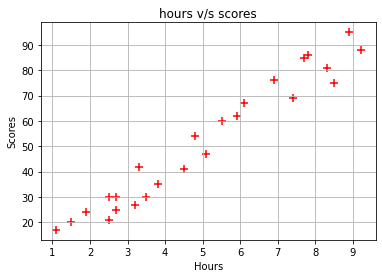

In [9]:
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.grid(True)
plt.title('hours v/s scores')
plt.scatter(data.Hours,data.Scores,color='red',marker='+',s=50)

# Checking the correlation

In [10]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:>

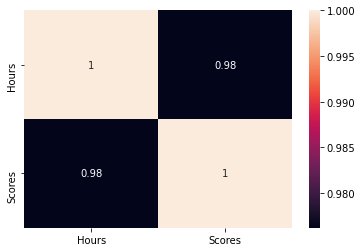

In [11]:
sns.heatmap(data.corr(),annot=True)

# Split data in training and testing

In [12]:
x = data.drop('Scores',axis=1)
x.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [13]:
y = data[['Scores']]
y.head()

,Scores
0,21
1,47
2,27
3,75
4,30


In [14]:
x.shape , y.shape

((25, 1), (25, 1))

# Model initialization

In [15]:
regression_model = LinearRegression()

In [16]:
regression_model

LinearRegression()

# Fit the data(train the model-independent,dependent variable-target variable)


In [17]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=2) 

In [18]:
regression_model.fit(x_train,y_train)

LinearRegression()

In [19]:
x_train.head()

,Hours
9,2.7
3,8.5
16,2.5
12,4.5
22,3.8


In [20]:
x_test

,Hours
14,1.1
0,2.5
17,1.9
6,9.2
23,6.9


In [21]:
y_train.head()

,Scores
9,25
3,75
16,30
12,41
22,35


In [22]:
y_test

,Scores
14,17
0,21
17,24
6,88
23,76


In [23]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((20, 1), (5, 1), (20, 1), (5, 1))

In [24]:
regression_model.score(x_train,y_train)

0.9423348138802985

In [25]:
regression_model.score(x_test,y_test)

0.9735538080811826

In [26]:
y_pred = regression_model.predict(x_test)
y_pred

array([[12.44258714],
       [26.35944834],
       [20.39507925],
       [92.9615698 ],
       [70.09815497]])

In [27]:
y_test

,Scores
14,17
0,21
17,24
6,88
23,76


# Slope and Intercept

In [28]:
print('Slope:' ,regression_model.coef_) 
print('Intercept:', regression_model.intercept_) 


Slope: [[9.94061514]]
Intercept: [1.50791048]


# Print Values

In [29]:
from sklearn.metrics import mean_squared_error


In [30]:
mse=mean_squared_error(y_test,y_pred)
mse

24.38762033985666

In [31]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Root mean squared erroe:',mse**0.5)

Mean Absolute Error: 4.877039354964484
Root mean squared erroe: 4.938382360637607


# Model evaluation

In [32]:
r2=r2_score(y_test,y_pred)
r2

0.9735538080811826

# Our regression line has fit -97% accuracy of the model is 97%

# y = mx+c

In [33]:
# since, y=mx*c
line = regression_model.intercept_+regression_model.coef_*x
line

,Hours
0,26.359448
1,52.205048
2,33.317879
3,86.003139
4,36.300063
5,16.418833
6,92.961570
7,56.181294
8,84.015016
9,28.347571


In [34]:
data.Scores

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

# Show the fit line on Predicted Values

In [35]:
import warnings
warnings.filterwarnings("ignore")

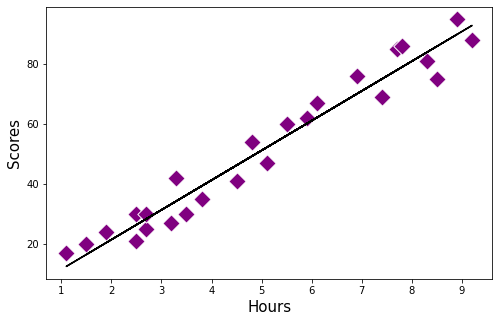

In [36]:
plt.figure(figsize=(8,5))
sns.scatterplot(data['Hours'],data['Scores'],s=150,color='purple',marker='D')
plt.plot(data['Hours'],line,'black')
plt.xlabel(xlabel='Hours',fontsize=15)
plt.ylabel(ylabel='Scores',fontsize=15)
plt.show()


# Comparing Actual and Predicted Values

In [37]:
scores_predicted = regression_model.predict(x)
scores_predicted

array([[26.35944834],
       [52.20504771],
       [33.31787894],
       [86.0031392 ],
       [36.30006348],
       [16.4188332 ],
       [92.9615698 ],
       [56.18129377],
       [84.01501617],
       [28.34757137],
       [78.05064708],
       [60.15753983],
       [46.24067863],
       [34.31194046],
       [12.44258714],
       [89.97938526],
       [26.35944834],
       [20.39507925],
       [62.14566286],
       [75.06846254],
       [28.34757137],
       [49.22286317],
       [39.28224803],
       [70.09815497],
       [79.0447086 ]])

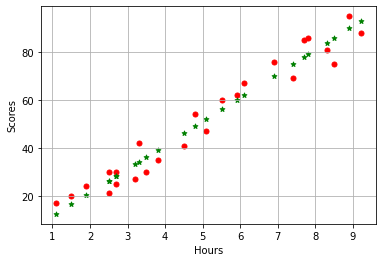

In [38]:
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.grid(True)
plt.scatter(data.Hours,data.Scores,color='red',s=25)

#predicted value
plt.scatter(data.Hours,scores_predicted,color='green',marker='*',s=25)
plt.show()

# What will be predicted score if a student studies for 9.25 hrs/ day?

In [39]:
price_predicted = regression_model.predict([[9.25]]) 
price_predicted

array([[93.45860056]])

# Thank You...